### Plotting utilities for Jupyter

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import time
import matplotlib.pyplot as plt
from IPython import display
def hold():
    display.display(fig1)
    display.display(fig2)
    display.display(fig3)
    display.clear_output(wait=True)
    time.sleep(1.0)

### Set up Grover's

In [3]:
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit.converters import circuit_to_dag, dag_to_circuit

# Problem size: width and number of iterations
n = 5
steps = int(np.sqrt(2**n))

# Diagonal operators for encode and reflect
encode_state = Statevector.from_label('00001')  # the state that induces a phase
reflect_state = Statevector.from_label('00000')  # the state about which we reflect
encode_circuit = Diagonal((-1)**encode_state.data)
reflect_circuit = Diagonal((-1)**reflect_state.data)

In [4]:
# A single Grover's step: encode + reflect
encode_and_reflect = QuantumCircuit(n)
all_qubits = encode_and_reflect.qubits
encode_and_reflect.append(encode_circuit, all_qubits, label='Encode')
encode_and_reflect.h(all_qubits)
encode_and_reflect.append(reflect_circuit, all_qubits, label='Reflect')
encode_and_reflect.h(all_qubits)
print(encode_and_reflect)

     ┌─────────┐┌───┐┌──────────┐┌───┐
q_0: ┤0        ├┤ H ├┤0         ├┤ H ├
     │         │├───┤│          │├───┤
q_1: ┤1        ├┤ H ├┤1         ├┤ H ├
     │         │├───┤│          │├───┤
q_2: ┤2 Encode ├┤ H ├┤2 Reflect ├┤ H ├
     │         │├───┤│          │├───┤
q_3: ┤3        ├┤ H ├┤3         ├┤ H ├
     │         │├───┤│          │├───┤
q_4: ┤4        ├┤ H ├┤4         ├┤ H ├
     └─────────┘└───┘└──────────┘└───┘


### Iterate through Grover's steps, visualize circuit, state and probabilities with each step

{}


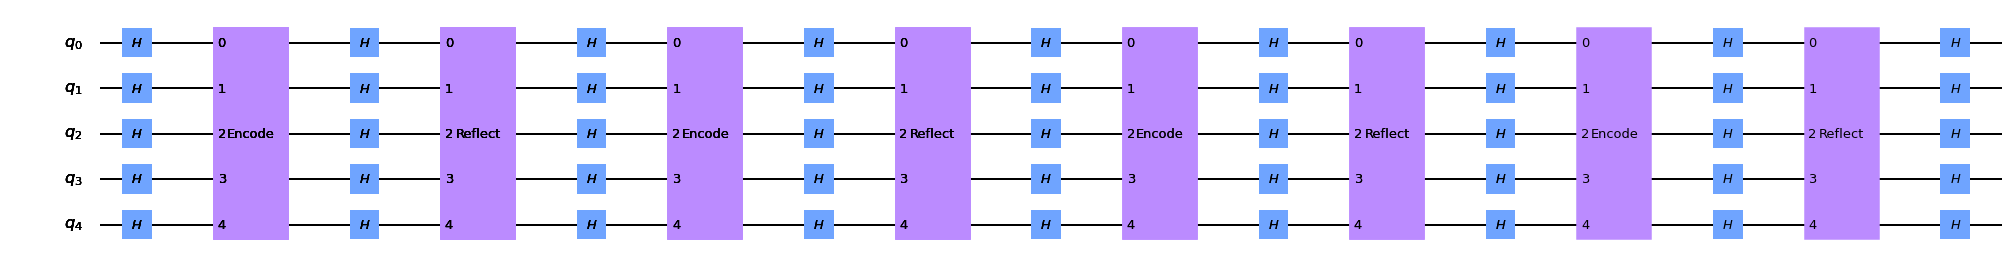

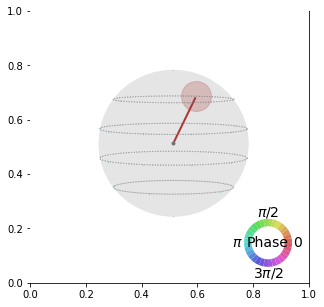

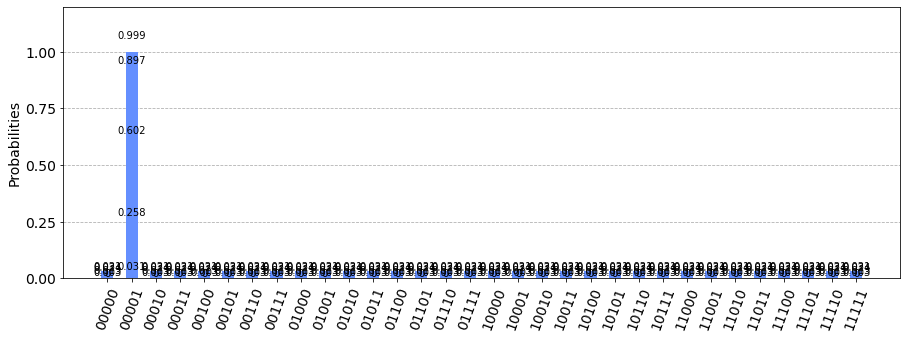

In [5]:
%matplotlib inline

# Draw and update 3 figures: circuit, state, probabilities
fig1 = plt.figure(figsize=(12,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(15,5))

# Build and analyze incrementally
grover_circuit = QuantumCircuit(n)
all_qubits = grover_circuit.qubits

# First layer: Prepare uniform superposition
grover_circuit.h(all_qubits)
state = Statevector.from_label('+' * len(all_qubits))

# Keep iterating to amplify the correct amplitude
for step in range(steps):
    # visualize circuit, state, probabilities
    grover_circuit.draw(output='mpl', fold=100, ax=fig1.gca())
    plot_state_qsphere(state.data, ax=fig2.gca())
    plot_histogram(state.probabilities_dict(), ax=fig3.gca())
    hold()

    # step circuit
    grover_circuit = grover_circuit.compose(encode_and_reflect)

    # step state
    state = state.evolve(encode_and_reflect)